In [1]:
import glob
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.segmentation import find_boundaries
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

from dataset import PolarisPublicationData

In [2]:
data = PolarisPublicationData()

In [3]:
results, segmentation, bulk_counts = data.load_data(figure='S10')

In [4]:
boundaries = find_boundaries(segmentation[0,...,0])

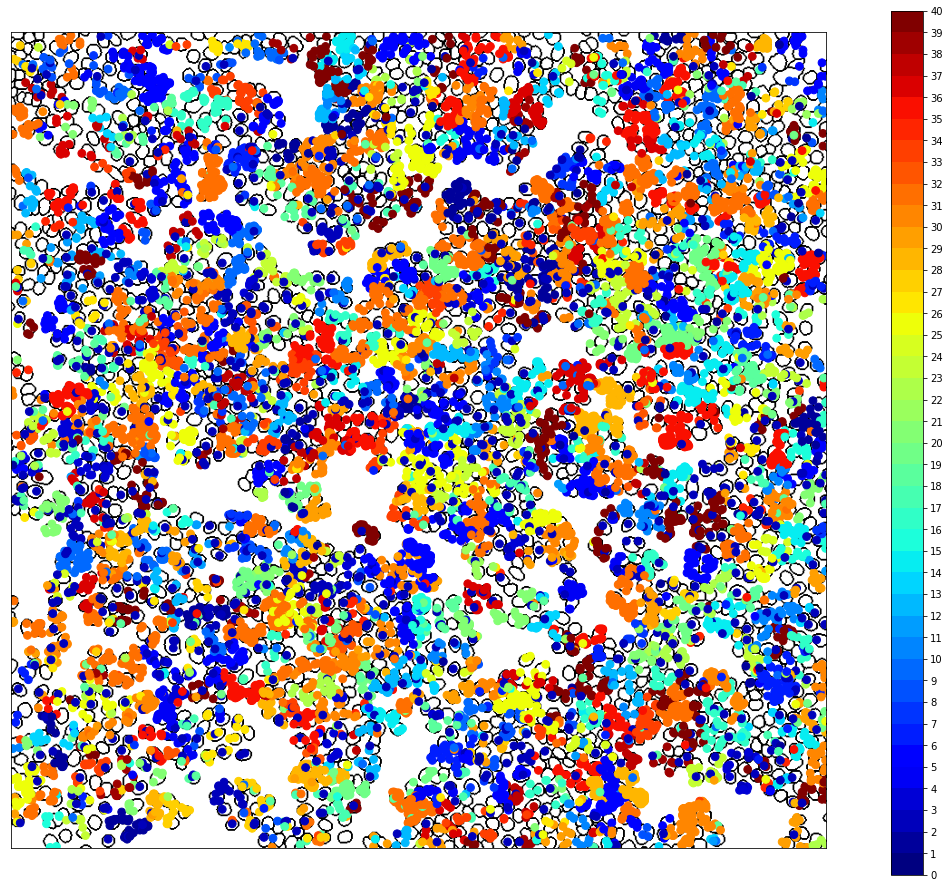

In [5]:
import matplotlib as mpl

cmap = plt.cm.jet  # define the colormap
# extract all colors from the jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, max(results.predicted_id), max(results.predicted_id)+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig,ax = plt.subplots(1,1,figsize=(15,15))
plt.imshow(boundaries*-1, cmap='gray')
plt.scatter(results.y, results.x, c=results.predicted_id, s=60, cmap=cmap, norm=norm)
plt.xticks([])
plt.yticks([])

ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

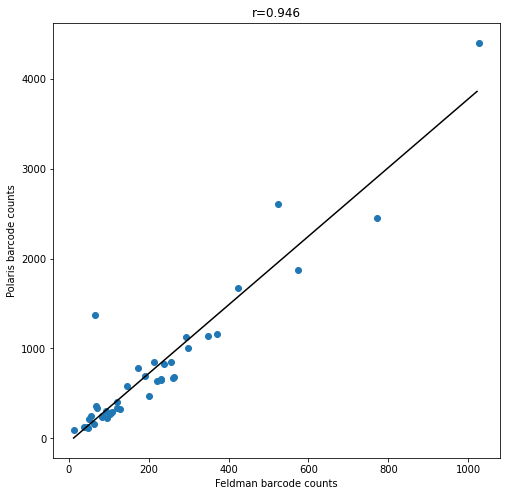

In [6]:
x = bulk_counts['Feldman et al.'].values
y = bulk_counts['Polaris'].values

reg = LinearRegression(fit_intercept=True).fit(x.reshape(-1, 1), y.reshape(-1, 1))
xx = np.arange(x.min(), x.max(), 10).reshape(-1, 1)
yy = reg.predict(xx)
plt.figure(figsize=(8,8))
plt.plot(xx, yy, c='k')
        
plt.scatter(x,y)
plt.xlabel('Feldman barcode counts')
plt.ylabel('Polaris barcode counts')
plt.title('r=%.3f'%(pearsonr(x,y)[0]))

plt.show()